# COVID-19 impact on electricity prices and consumption

In [1]:
# Imports
import pandas as pd
import os
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Navigating to the right directory (only to be run once)
os.chdir("..")

## Relationship between electricity prices and consumption in Estonian spot market

Before jumping into finding COVID-19 impact on electricity prices and consumption in Estonia it might be useful to investigate correlation between the last two for various reasons. 

For example, if any correlation is found then how COVID-19 influenced it if at all? 


In [3]:
# Importing nordpool spot market data
nordpool = pd.read_csv(os.path.join("data", "processed", "nordpool_estonia.csv"))

In [4]:
# Clean the data
nordpool.dropna(inplace=True)
nordpool.drop_duplicates(inplace=True)

In [5]:
# Converting "Date" and "Time" columns into useful datetime objects
time = pd.to_datetime(nordpool.pop('Date')) + pd.to_timedelta(nordpool.pop('Time'))
nordpool["datetime"] = time
nordpool = nordpool.set_index("datetime")

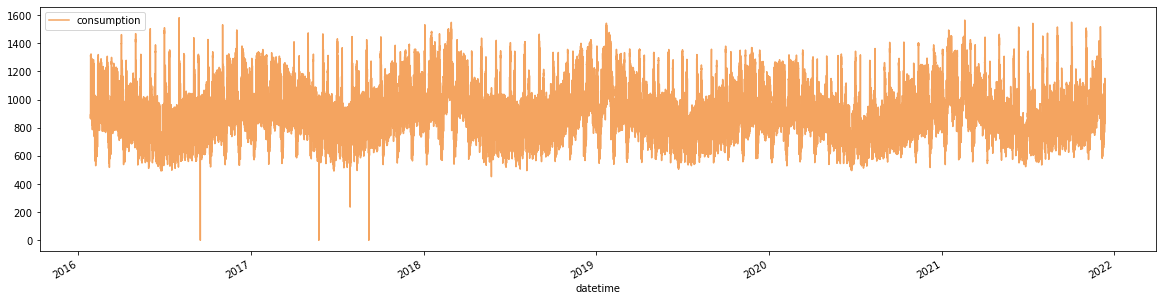

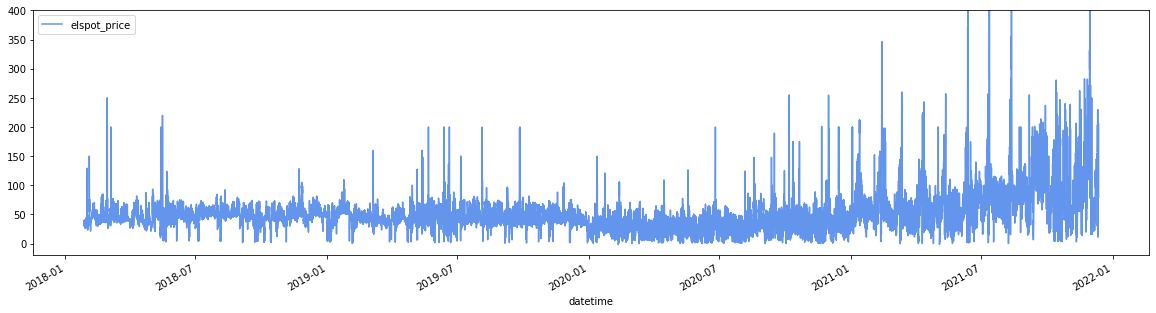

In [6]:
# Plotting the graphs
consumption = nordpool.drop("elspot_price", axis = 1)
prices = nordpool.drop("consumption", axis = 1)

consumption["2016-01-27":"2021-12-20"].plot(figsize=(20,5), color="sandybrown");
prices["2018-01-27":"2021-12-20"].plot(ylim = (-20, 400), figsize=(20, 5), color="cornflowerblue");

## First data visualization conclusions

It is clear that correlation between spot market electricity prices and energy consumption clearly exists and grows stronger over time. From around 2021-01 visible overlap is seen more and more.

## COVID-19 impact on energy consumption

### Overview 

COVID-19 had a big impact on the majority of the population and how the society functions as a system, therefore influencing the energy industry. On the macro-level, major industrial and commercial demands decrease because of the government imposed lockdowns and regulations. On the micro-level however, things are totally different. People started to work from home when possible therefore substantially increasing the residential energy demands [2]. Though it is not possible for the increased residential demand to mitigate the negative effects caused by macro-level demand decline. This implies an overall decrease in energy demand and is backed by multiple studies. For example, largest world energy demand decline since World War II happened just a year ago, in 2020 [3].

Although 2020 was a bad year for the energy industry, 2021 turned out to be a lot more positive in that regard. After relaxation of lockdown regulations, emerge of vaccines and overall societal adaptation to COVID-19, energy demand has seen a major rebound and recovery from the lows of 2020 as a result.

Text(0, 0.5, 'Change in %')

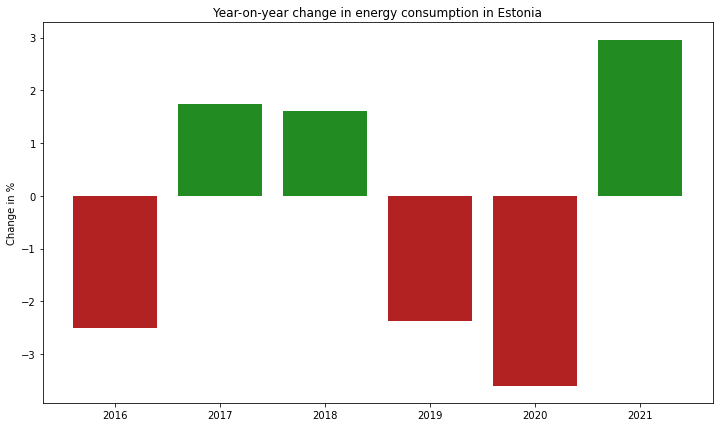

In [7]:
# Bar-chart for the 2016-2021 period
year = 2016
years = []
changes = []
colors = []

for i in range(6):
    mean_before = consumption[str(year - 1) + "-01-01":str(year) + "-01-01"].mean()
    mean_now = consumption[str(year) + "-01-01":str(year + 1) + "-01-01"].mean()
    change = float(((mean_now / mean_before) - 1) * 100)
    years.append(year)
    changes.append(change)
    year += 1
    if change < 0:
        colors.append("firebrick")
    else:
        colors.append("forestgreen")

consumption_changes = pd.DataFrame({"years":years,"changes":changes, "colors":colors})
f, ax = plt.subplots(figsize=(12,7))
plt.bar(consumption_changes["years"], consumption_changes["changes"], color=consumption_changes["colors"])
plt.title("Year-on-year change in energy consumption in Estonia")
plt.ylabel("Change in %")


As shown in the graph, Estonia is no exception to overall worldwide decrease in energy demand when the COVID-19 outbreak first occurred in 2020. The next year is also inline with the global trends in regards of energy demand stabilization and recovery from the 2020 major decrease.

In [8]:
# To be exact, change in 2020 energy consumption compared to 2019 mean is as follows (in %):
print(float(consumption_changes.loc[consumption_changes["years"] == 2020]["changes"]))

-3.596958879434209


### 2020

First COVID-19 case was discovered in Wuhan, China. It didn't take long for it to turn into a worldwide pandemic, spreading to many countries, including Estonia. As a result, government had to react in some way or another, imposing curtailment measures and implementing lockdowns.

<Figure size 720x360 with 0 Axes>

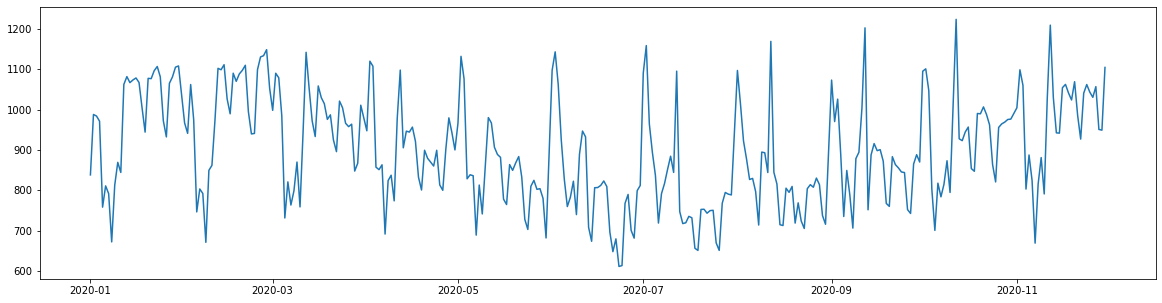

<Figure size 720x360 with 0 Axes>

In [43]:
def generalize_to_day_means():
    means = []
    dates = []
    for i in range(1, 12):
        for j in range(1, 31):

            month = str(i)
            day = str(j)

            try:
                mean = float(consumption["2020-" + month + "-" + day].mean())
                date = pd.to_datetime("2020-" + month + "-" + day)
                means.append(mean)
                dates.append(date)
            except:
                break
    return means, dates


means, dates = generalize_to_day_means()
f, ax = plt.subplots(figsize=(20,5))            
consumption_early_2020 = pd.DataFrame({"dates":dates,"means":means}) 
consumption_early_2020.set_index("dates")
plt.plot(consumption_early_2020["dates"], consumption_early_2020["means"])
plt.figure(figsize=(10, 5))

Given figure is composed of average energy consumption per day and it is clearly seen that after the winter months energy consumption declines rapidly. Though it is hard to measure COVID-19 impact on the energy demand decline because timeframe of first government imposed regulations overlaps with winter months ending. After the winter months people use less heaters, lamps etc so naturally energy demand decreases.

In [40]:
def consumption_year_graph(year):
    means = []
    dates = []
    months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
    year = str(year)
    for i in range(1, 13):
        month = str(i)
        mean = float(consumption[year + "-" + month].mean())
        date = pd.to_datetime(year + "-" + month)
        means.append(mean)
        dates.append(date)
    
    f, ax = plt.subplots(figsize=(12,7))
    consumption_year = pd.DataFrame({"dates":dates,"means":means})
    consumption_year.head(20)
    consumption_year.set_index("dates")
    plt.plot(consumption_year['dates'], consumption_year['means'])
    return consumption_year

,dates,means
0,2020-01-01,984.181452
1,2020-02-01,995.290230
2,2020-03-01,951.107672
3,2020-04-01,899.922222
4,2020-05-01,839.819892
5,2020-06-01,805.437500
6,2020-07-01,802.557796
7,2020-08-01,826.674731
8,2020-09-01,872.631944
9,2020-10-01,929.997323


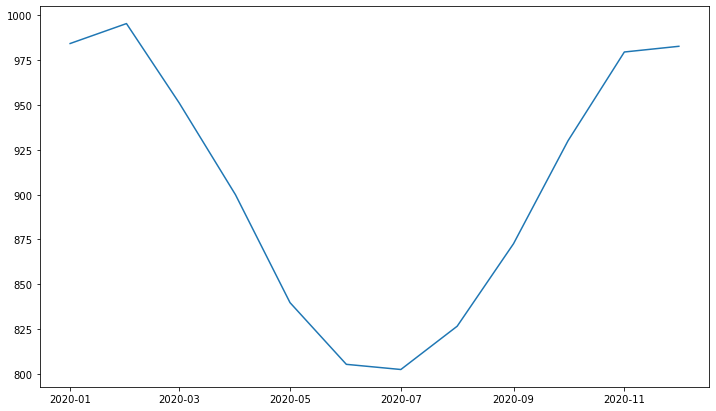

In [41]:
cons = consumption_year_graph(2020)
cons.head(20)

This graph contains less noise than the previous one. The dip in energy demand after the winter months is clearly visible. Now it will be useful to compare that to previous years, before COVID-19 pandemic.

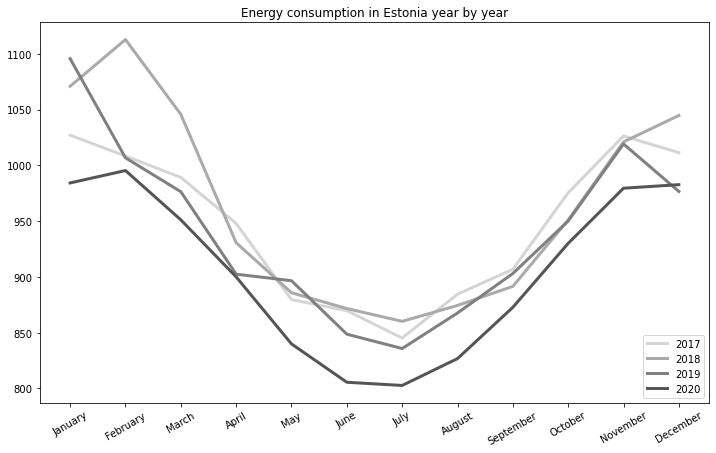

In [42]:
def consumption_years_graph(n_of_years):
    colors = plt.cm.gray(np.linspace(0,1,n_of_years + 3))
    years = str(2021 - int(n_of_years))
    year_legend = []
    f, ax = plt.subplots(figsize=(12,7))
    for j in range(n_of_years):
        years = str(years)
        means = []
        dates = []
        months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
        for i in range(1, 13):
            
            
            month = str(i)
            mean = float(consumption[years + "-" + month].mean())
            date = pd.to_datetime(years + "-" + month)
            means.append(mean)
            dates.append(date)
       
        consumption_year = pd.DataFrame({"dates":dates,"means":means, "months":months})
        consumption_year.set_index("dates")
        plt.plot(consumption_year["months"], consumption_year["means"], color=colors[(n_of_years + 1) - j], linewidth=3)
        plt.xticks(rotation = 30)
        year_legend.append(years)
        years = int(years) + 1
    
    plt.title("Energy consumption in Estonia year by year")
    plt.legend(year_legend, loc=4)
consumption_years_graph(4)    

Now it is quite easy to spot how COVID-19 affected energy demand in Estonia. For example in June 2019 energy demand resulted in approximately 850MW while in 2020, after the outbreak, it resulted in about <800MW, which is a 6% deviation from the previous year due to COVID-19 pandemic. In the years prior to 2020, energy consumption decline reduced around May, which could be because of both macro-level and micro-level energy demand rebound caused by internal residential cooling systems as well as longer working hours of shops, bars and other public places coupled with population's more active lifestyle due to positive weather changes. In 2020 however, then again, lockdowns, safety measures crippled social events and previous pre-COVID lifestyle.

Text(0.5, 1.0, 'Energy consumption in March of 2020, Estonia')

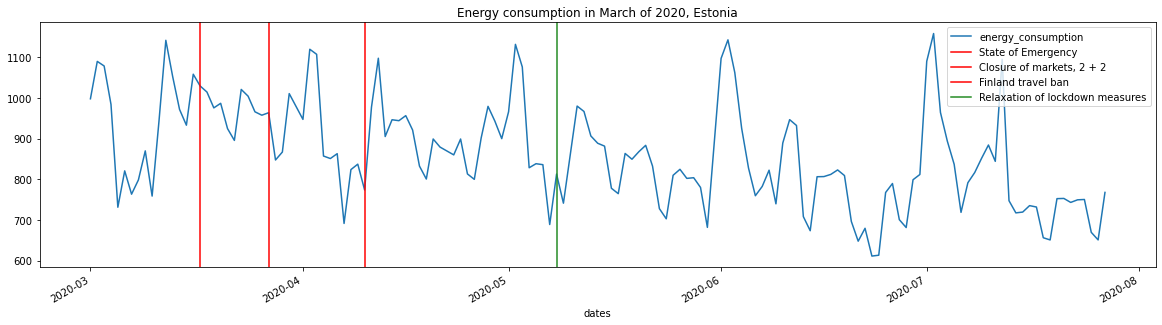

In [89]:
means, dates = generalize_to_day_means()          
consumption_early_2020 = pd.DataFrame({"dates":dates,"energy_consumption":means}) 
consumption_early_2020 = consumption_early_2020.set_index("dates")
consumption_early_2020["2020-03-01":"2020-07-27"].plot(figsize=(20,5))
plt.axvline(x="2020-03-17", color="red", label="State of Emergency")
plt.axvline(x="2020-03-27", color="red", label="Closure of markets, 2 + 2")
plt.axvline(x="2020-04-10", color="red", label="Finland travel ban")
plt.axvline(x="2020-05-08", color="forestgreen", label="Relaxation of lockdown measures")
plt.legend()
plt.title("Energy consumption in March of 2020, Estonia")

First person that contracted COVID-19 in Estonia was discovered on 27th of February. It didn't take long for the virus to spread and state of emergency was declared 17th of March, 2020. This implies travel ban for citizens that.. to be continued..

## COVID-19 impact on electricity prices

In [12]:
# Analyse how it was before the covid, general trends, means 

# What happened after COVID-19? lockdown impact and all that

## References
1. Klemeš JJ, Fan YV, Jiang P, Impacts of COVID-19 on energy demand and consumption: Challenges, lessons and emerging opportunities https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7834155/
2.  Senthilkumar V.S., Reddy K.S., Subramaniam U. COVID-19: Impact analysis and recommendations for power and energy sector operation https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7834155/
3. Global Energy Review, https://iea.blob.core.windows.net/assets/d0031107-401d-4a2f-a48b-9eed19457335/GlobalEnergyReview2021.pdf